# Solving Non-Linear System

`2020-12-13`

_Zhiyuan Chen, Department of Trade Economics, Renmin Business School_

This notebook is based on the class notes by __Paul Grieco__

## Contents

- [Solving Non-Linear System](#Solving-Non-Linear-System)
  - [Nonlinear Equation Form](#Nonlinear-Equation-Form)
  - [Bisection](#Bisection)
  - [Newton's Methods](#Newton's-Methods)
  - [Quasi-Newton Methods](#Quasi-Newton-Methods)
    - [Secant Method](#Secant-Method)
    - [Broyden's Method](#Broyden's-Method)
- [A Rountine of Debugging](#A-Routine-of-Debugging)

## Nonlinear Equation Form

Consider a function $f: \mathbf{R}^n\rightarrow \mathbf{R}^n$, our objective is to find the root such that
$$
f(x) = 0
$$

We may also want to solve an equivalent fixed point problem $g(x)=x$, simply by defining $f(x)=g(x)=x$. 

## Bisection
* The simplist method of equation sovling is bisection, which is applied only to single variable equations, although it can be used as part of multi-dimensional solution approaches. 

    1. $f: \mathbf{R}\rightarrow \mathbf{R}$ is continuous
    2. There exists $a<b$ such that $f(a)<0<f(b)$

* From here, the bisection algorithm simply bisects $[a, b]$ to get closer and closer to zero:
    1. Given $[a, b]$, compute the midpoint $(a+b)/2\rightarrow c$ and $f(c)$.
    2. If $f(c)<0$, assign $a = c$, else assign $b = c$.
    3. The algorithm stops when $b-a\leq \epsilon$


### Example

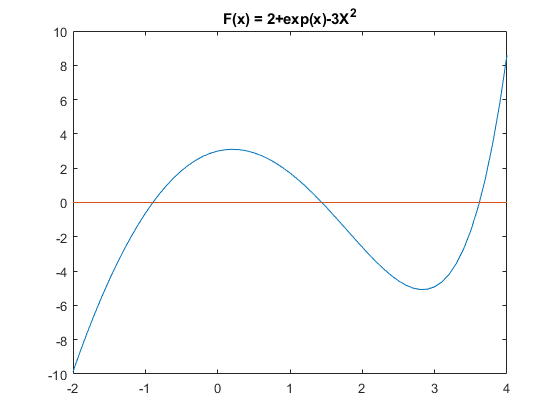

In [1]:
X = -2:0.1:4;
Fx= 2 + exp(X) - 3.*(X.^2);
figure
plot(X, Fx, X, zeros(size(X)));
title("F(x) = 2+exp(x)-3X^2")

The function is continuous, and it has a zero value so the bisection method should be able to find a root. An example bisection code can be written as follows:

```
function [x , fx] = bisection(f, a, b, tolx, tolf) 
  % Make sure conditions for bisection apply,
  % they have to include in the same directory
  % toolbox is a collection of things in a directory
  
  
  %notice that in python or R, we can just list function in our code.
  
  %the assert makes sure our critical assumptions right
  %always write assert and use them to inform us in finding bug
  assert(b > a);
  assert(f(a) < 0);
  assert(f(b) > 0); 
  
  % MATLAB's way of allowing default parameters: 
  assert(nargin >= 3)
  %nargin is the number the argument in the function, it's unique in matlab
  %not in other language
  %it's also useful to do this since we can set default level of tolx and
  %tolf here. It can be done in R and python in other way.
  
  if (nargin == 3)
      tolx = 1e-15; %This tolerance is to let program stop when bracket is small
      tolf = 1e-15; %This tolerance is to stop if it happens to compute a root
  end
  
  % Finally, the actual algorithm:
  fc = 1;
  while ((b - a) > tolx) && (abs(fc) > tolf)
      c = (a+b)/2;
      fc = f(c);
      if (fc < 0)
          a = c;
      else
          b = c;
      end
  end
  ```

We can call the function `bisection` by passing a function. In MATLAB,all variables are really pointers, so we can assign a function using anonomyous functions rather than writing a file for it:

In [3]:
%"@" is just a pointer to a function in the memory
f = @(x) 2 + exp(x) - 3.*(x.^2)
f
f(0)
feval(f, 0)  %evaluating function at zero


f =

  function_handle with value:

    @(x)2+exp(x)-3.*(x.^2)


f =

  function_handle with value:

    @(x)2+exp(x)-3.*(x.^2)


ans =

     3


ans =

     3




In [10]:
% Use bisection to find zero roots
sol1 = bisection(f, -1, 4)
f(sol1)


sol1 =

    3.6184


ans =

     0




We just found a solution, we can change the intervals to find other solutions

In [11]:
sol2 = bisection(f, -1, 1)
f(sol2)


sol2 =

   -0.8960


ans =

   8.8818e-16




In [6]:
sol3 = bisection(f, 2, 4)
f(sol3)


sol3 =

    3.6184


ans =

     0




We can also adjust the stopping tolerance away from the defaults:

In [12]:
sol4 = bisection(f, -1, 4, 1e-3, 1e-5)

f(sol4)


sol4 =

    3.6185


ans =

    0.0014




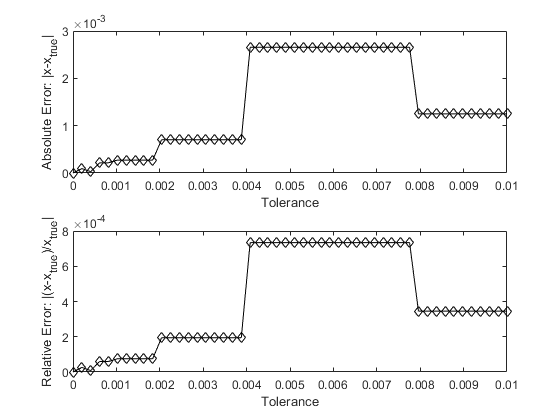

In [23]:
Tol = linspace(1e-15, 1e-2, 50);
Sol = zeros(length(Tol), 1);
for i = 1:length(Tol)
    Sol(i) = bisection(f,2,4,Tol(i), Tol(i));
end
figure
subplot(2,1,1)
plot(Tol, abs(Sol-Sol(1)), "black-d")
ylabel('Absolute Error: |x-x_{true}|')
xlabel('Tolerance')
subplot(2,1,2)
plot(Tol, abs((Sol-Sol(1))./Sol(1)), "black-d")
ylabel('Relative Error: |(x-x_{true})/x_{true}|')
xlabel('Tolerance')


### Iteration
Notice that we can not guanrantee to find a solution. But bisection always have. 

As with linear equations, we can simply iterate nonlinear equations in hopes that they converge to a fixed point:
$$
x^{(k+1)} = g(x^{(k)})
$$
This means we have found the solution $x^*$ such that $g(x^*)=x^*$. The condition ensuring that the iteration is convergent is

$$
||g'(x^*)||<1
$$
More precisely, we want to ensure that mapping from $x$ to $g(x)$ is a contraction mapping. 

In [26]:
% example of iteration
g = @(x) [x(1)^.5, x(1).^.25 + x(2).^.75];
x = [.5 .5];
maxit = 1000;
tolit = 1e-6;
for iter = 1:maxit
    nextX = g(x);
    if abs(x - nextX) < tolit
        break;
    end
    x = nextX;
    %disp([iter x]);
    Iterx(iter,:) =[iter x];
end

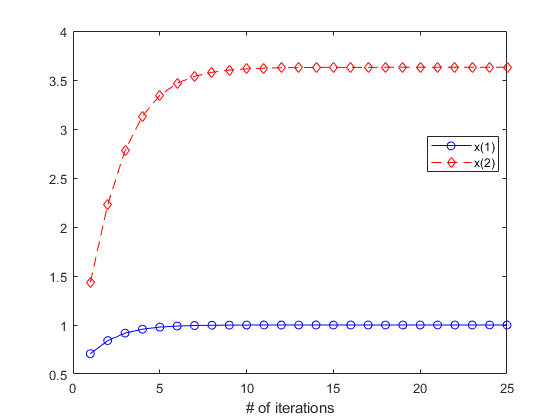

In [46]:
figure
plot(Iterx(:,1), Iterx(:,2),'b-o', Iterx(:,1), Iterx(:, 3), 'r--d')
legend('x(1)', 'x(2)', 'Location', 'best')
xlabel('# of iterations')

In [47]:
format long
disp([iter x g(x)]);
format short
% %format Set output format.
%     format with no inputs sets the output format to the default appropriate
%     for the class of the variable. For float variables, the default is
%     format SHORT.
%
%     format does not affect how MATLAB computations are done. Computations
%     on float variables, namely single or double, are done in appropriate
%     floating point precision, no matter how those variables are displayed.
%     Computations on integer variables are done natively in integer. Integer
%     variables are always displayed to the appropriate number of digits for
%     the class, for example, 3 digits to display the INT8 range -128:127.
%     format SHORT and LONG do not affect the display of integer variables.
%
%     format may be used to switch between different output display formats
%     of all float variables as follows:
%       format SHORT     Scaled fixed point format with 5 digits.
%       format LONG      Scaled fixed point format with 15 digits for double
%                        and 7 digits for single.
%       format SHORTE    Floating point format with 5 digits.
%       format LONGE     Floating point format with 15 digits for double and
%                        7 digits for single.
%       format SHORTG    Best of fixed or floating point format with 5
%                        digits.
%       format LONGG     Best of fixed or floating point format with 15
%                        digits for double and 7 digits for single.
%       format SHORTENG  Engineering format that has at least 5 digits
%                        and a power that is a multiple of three
%       format LONGENG   Engineering format that has exactly 16 significant
%                        digits and a power that is a multiple of three.

  26.000000000000000   0.999999979342605   3.629656143715231   0.999999989671302   3.629657044068090




The method of iteration is less robust than something like bisection, but it is easy, especially when you know that you have a contraction, it may be worth trying it before using alternative methods.

### Newton's (or Newton-Raphson) Method
Newton's method is the real workhorse for solving nonlinear equations. It
is an iterative scheme that follows the principle of *_successive
linearization_* . That is, it approximates the nonlinear problem with its
linear taylor approximation, solves that, and then checks the solution
of the original problem. 

Newton's method iterations are derived from a first-order Taylor approximation: 

$$ f(x) \approx f(x^{(k)}) + f'(x^{(k)})(x - x^{(k)}) = 0 $$

Solve for $x^{(k+1)}$ to get the iteration rule: 

$$ x^{(k)} - [f'(x^{(k)})]^{-1}f(x^{(k)}) \rightarrow x^{(k+1)}  $$

For Newton's Method to work we need: 

* $f$ is continuously differentiable.  
* $f(x^{(0)})$ is sufficiently close to a root. 
* $f'$ is invertible at the root.

These will not always hold, and there is no theoretical way to determine
"sufficiently close". 

Let's follow the __Miranda and Fackler__ textbook and use Newton's method to
solve a Cournot Duopoply. The primatives are: 

* Demand for the good is CES: $P(q) = q^{-1/\eta}$, where $q = q_1 + q_2$. 
* Each firm has quadratic costs: $C_i(q) = \frac{1}{2} c_i q_i^2$ for $i = 1,2$. 

Then firm $i$ solves, 

$$ \max_{q_i} P(q_i + q_{-i})q_i - C_i(q_i) $$

We can find equilibrium of this model by simultaneously solving both
firms first order conditions, which will be nonlinear equations for $i = 1,2$: 

$$ f_i(q) = (q_i + q_{-i})^{-1/\eta} - (1/\eta)(q_i + q_{-i})^{-1/\eta-1}q_i
- c_iq_i = 0$$

So we can write a function to calculate this function and its Jacobian: 
```
function [fval fjac] = cournot(q)
    % Set parameters:
    c = [0.6; 0.8];
    eta = 1.6;
    e = -1/eta; %For readability

    %Evaluate function: 
    %This is just the first order condition
    fval = sum(q)^e + e*sum(q)^(e-1)*q - diag(c)*q;

    %Evaluate Jacobian: 
    %this is just jacobian
    %before doing Newton, always check whether we get Jacobian is correct.
    fjac = e*sum(q)^(e-1)*ones(2,2) + ...
           e*sum(q)^(e-1)*eye(2) + ...
           (e-1)*e*sum(q)^(e-2)*q*[1 1] - diag(c);
end
```


To solve this with Newton's method we just follow the iteration rule: 



In [60]:
q = [2; 2];
tol = 1e-8;
maxit = 100;
for iter =1:maxit
    [f, dF] = cournot(q);
    q = q - dF\f;
    fprintf('Iter: %d, q = (%f, %f), f(q) = (%f, %f)\n', iter, q(1), q(2), f(1), f(2));
    if norm(f) < tol
        break
    end
end
disp("--------------------------Solution------------------------------")
fprintf('Iter: %d, q = (%f, %f), f(q) = (%f, %f)\n', iter, q(1), q(2), f(1), f(2));

Iter: 1, q = (0.683243, 0.525395), f(q) = (-0.910942, -1.310942)
Iter: 2, q = (0.828182, 0.673938), f(q) = (0.164513, 0.226652)
Iter: 3, q = (0.839518, 0.688707), f(q) = (0.011336, 0.018862)
Iter: 4, q = (0.839568, 0.688796), f(q) = (0.000050, 0.000112)
Iter: 5, q = (0.839568, 0.688796), f(q) = (0.000000, 0.000000)
--------------------------Solution------------------------------
Iter: 5, q = (0.839568, 0.688796), f(q) = (0.000000, 0.000000)



#### Numerical Differentiation
While it is best to have an analytic derivative, it is common to
approximate derivatives numerically. With most Newton-based solvers such as KNITRO and |fsolve| they will take their own numerical derivatives if you don't specify the gradient. In our example above, that also works just fine: 

In [61]:
options = optimoptions('fsolve','Display','final','SpecifyObjectiveGradient',false);
fsolve('cournot', [2; 2], options)


Equation solved.

fsolve completed because the vector of function values is near zero
as measured by the value of the function tolerance, and
the problem appears regular as measured by the gradient.


ans =

    0.8396
    0.6888




What's going on under the hood? Exactly what you would expect. Recall the
definition of a derivative:

$$ f'(x) = \lim_{h \rightarrow 0} \frac{f(x+h) - f(x)}{h} $$

So let's just approximate this with a 'small' $h$. How small is small?
Back to Taylor expansions: 

$$f(x + h) = f(x) + f'(x)h + O(h^2) $$

$$ f'(x) = \frac{f(x+h) - f(x)}{h} + O(h^2)$$

So the error is of order $h^2$. This is a one-sided finite difference
equation. It is probably the most common because it requires only a
single additional computation of $f$ for each direction. 

However, its not hard to increase accuracy. Consider two second order
expansions: 

$$f(x + h) = f(x) + f'(x)h + f''(x)\frac{h^2}{2} + O(h^3) $$

$$f(x - h) = f(x) - f'(x)h + f''(x)\frac{h^2}{2} + O(h^3) $$

Subtracting one from the other and solve for $f'(x)$: 

$$f'(x) = \frac{f(x+h) - f(x-h)}{2h} + O(h^3)$$




notice that this higher accuracy comes at the cost of calculating more
things When the function is really complicated, it is costly.

We can take this further and gain even more accuracy at the cost of
additional funciton evaluations. 

This still leaves us the question of how to set $h$. __Miranda and Fackler__
suggest the rule of thumb for one-sided derivatives. 

$$h = \max(|x|, 1) \sqrt{(\epsilon)}$$

Where $\epsilon$ is machine epsilon. The same rule of thump for two-sided
derivatives would lead to: 

$$h = \max(|x|, 1) \sqrt[3]{(\epsilon)}$$

These amount to about $10^{-8}$ or to $10^{-6}$ respecitively.

We can implement a one-sided numerical Jacobian as `myJac.m`:
```
function J = myJac(f, x)
%this function numerically compute the jacobian matrix
    fx = feval(f, x);
    J=zeros(length(fx),length(x));  %pre-allocate
    xperturb=x;
    h = max(norm(x), 1)*sqrt(eps);
    for i=1:length(fx)
      xperturb(i)=x(i)+h;
      J(:,i)=(feval(f,xperturb)-fx)/h;
      xperturb(i)=x(i);
    end
end

```



Note that the Jacobian takes $N$ function evaluations to compute,
therefore for large functions, computing a numerical derivative may
produce a time sink if $f$ is expensive to compute.
In this case, it may be worthwhile to code the analytical
Jacobian.  This is a classic *programmer-time/compute time tradeoff*.  


In [65]:
% the numerical jacobian
mJ = myJac('cournot', q)
[f, J] = cournot(q)


mJ =

   -0.9474   -0.0337
   -0.0840   -1.1977


f =

   1.0e-15 *

    0.1110
         0


J =

   -0.9474   -0.0337
   -0.0840   -1.1977




In [68]:
%Now let's use the numerical dirivative inside the Newton's iteration
q = [2; 2];
tol = 1e-8;
maxit = 100;
for iter =1:maxit
    f = cournot(q);
    dF = myJac('cournot', q); 
    q = q - dF\f;
    fprintf('Iter: %d, q = (%f, %f), f(q) = (%f, %f)\n', iter, q(1), q(2), f(1), f(2));
    if norm(f) < tol
        break
    end
end
disp('------------------------------------------------------------')
fprintf('Iter: %d, q = (%f, %f), f(q) = (%f, %f)\n', iter, q(1), q(2), f(1), f(2));

Iter: 1, q = (0.683243, 0.525395), f(q) = (-0.910942, -1.310942)
Iter: 2, q = (0.828182, 0.673939), f(q) = (0.164513, 0.226652)
Iter: 3, q = (0.839518, 0.688707), f(q) = (0.011336, 0.018862)
Iter: 4, q = (0.839568, 0.688796), f(q) = (0.000050, 0.000112)
Iter: 5, q = (0.839568, 0.688796), f(q) = (0.000000, 0.000000)
------------------------------------------------------------
Iter: 5, q = (0.839568, 0.688796), f(q) = (0.000000, 0.000000)



### Quasi-Newton Method
The Newton's method, which relied on iteratively
linearlizing the nonlinear problem around an iterate. Leading to the
iteration rule:

$$ x^{(k+1)} \leftarrow x^{(k)} - [f'(x^{(k)})]^{-1}f(x^{(k)}) $$

One issue with Newton's method is that it required computing the Jacobian
(matrix of derivatives) of the problem at every iteration, $[f'(x^{(k)})]^{-1}$. 
While this can
be done numerically it may be computatitionally intensive. 
Quasi-Newton methods are simply approaches to approximate the jacobian
rather than computing it directly (either numerically or analytically). 

 
* Secant Method
* Broyden's Method
* Gravity with Gravitas
 

#### Secant Method
Newton method is costly since jacobian is hard to compute.

Suppose $f : R \rightarrow R$ is __univariate__. 

While computing the numerical derivative would only require a single
function evaluation, we can save even that by just using the previous
iterate: 

$$f'(x^{(k)}) \approx \frac{ f(x^{(k)}) - f(x^{(k-1)}) }{ x^{(k)} -
x^{(k-1)}}$$

The secant method iteration just replaces the derivative in Newtons
method with this secant approximation: 

$$x^{(k)} - \frac{ x^{(k)} - x^{(k-1)} }{ f(x^{(k)})
- f(x^{(k-1)}) } f(x^{(k)})\rightarrow x^{(k+1)}$$

This illustrates the main concept of quasi-newton methods: use previously
computed information to efficiently approximate the derivative
information of the current iterate. 

Formally, the secant method requires 2 initial guesses. Although often
we just compute the derivative for the first iteration.   

In [51]:
% Let's recall our univariate function:
%f = @(x) 2 + exp(x) - 3.*(x.^2);
%Assign initial values
%two intitial values
x = 0;
xOld = 1;
fOld = f(xOld);

%we should also notice about the derivative=0 point

% Secant iterations:
tol = 1e-8;
maxit = 100;
for iter =1:maxit
    fVal = f(x);
    %.8f is floating point that has 8 digits after the decimal.
    fprintf('iter %d: x = %.8f, f(x) = %.8f\n', iter, x, fVal);
    if abs(fVal) < tol
        %break get us to end of this looop.
        break
    else
        xNew = x - ( (x - xOld) / (fVal - fOld) )* fVal;
        xOld = x;
        x = xNew;
        fOld = fVal;       
    end
end

iter 1: x = 0.00000000, f(x) = 3.00000000
iter 2: x = 2.34060815, f(x) = -4.04778771
iter 3: x = 0.99631611, f(x) = 1.73034902
iter 4: x = 1.39888437, f(x) = 0.18004596
iter 5: x = 1.44563702, f(x) = -0.02504405
iter 6: x = 1.43992794, f(x) = 0.00021426
iter 7: x = 1.43997637, f(x) = 0.00000024
iter 8: x = 1.43997643, f(x) = -0.00000000



#### Broyden's Method
Broyden's method generalizes the secant method to a multidimensional
problem. However, how do we update the entire Jacobian with a single pair
of function evaluations?

Effectively, for two values of $f:R^n \rightarrow R^n$ we need to solve 

$$ f(x^{(k)}) - f(x^{(k-1)}) = J^{(k)} (x^{(k)} - x^{(k-1)}) $$

But $J^{(k)}$ is the jacobian matrix and has $n\times n$ values, and we only have $n$ equations. Therefore, to get Jacobian, we make use of previous jacobian matrix. Let's define:
$$ f^k \equiv f(x^{(k)}) , 
\Delta x^k \equiv x^{(k)}-x^{(k-1)},
\Delta f^k \equiv f^k - f^{k-1}$$

The approximation equation can be re-written as

$$
J^k\Delta x^k \approx \Delta f^k \tag{*}
$$
This equation is undetermined when $n>1$. Broyden proposes to use the current estimate of the Jacobian matrix $J^{k-1}$ and improve it by minimizing the following __Frobenius norm__:
$$\min \|J^k-J^{k-1}\|_F$$
where the Frobenius norm is defined as:

><u>_Definition_</u>. Let $A$ be a $m\times n$ matrix,  $(a_1,\cdots,a_n)$ be the columns of matrix $A$. The __Frobenius norm__ or the __Hilbert-Schimidt norm__ is defined as:
$$
\|A\|_F = \sqrt{\sum_i^m \sum_j^n|a_{ij}|^2}
$$

This leads us to the updating rule:
$$
J^k = J^{k-1} +\frac{\Delta f^{k}-J^{k-1}\Delta x^{k}}{\|\Delta x^{k}\|^2} \Delta (x^{k})'
$$
If we know $J^k$, we may proceed using the Newton iteration rule:
$$
x^{k+1} = x^{k}-(J^k)^{-1}f(x^{k})
$$
Broyden suggested using the [Sherman-Morrison formula](https://blog.csdn.net/jclian91/article/details/80254568) to update directly the inverse of the Jacobian matrix: 

$$(J^k)^{-1} = (J^{k-1})^{-1}+\frac{\Delta x^k-(J^{k-1})^{-1}\Delta f^k}{(\Delta x^k)'(J^{k-1})^{-1}\Delta f^{k}}\Delta (x^k)'(J^k)^{-1}$$

In [69]:
q = [2; 3];
fVal = cournot(q)
iJac = inv(myJac('cournot', q)) %iJac is inverse jacobian

% Now for the Broyden iterations: 
maxit = 100; 
tol = 1e-6; 
for iter = 1:maxit
    fnorm = norm(fVal);
    fprintf('iter %d: q(1) = %f, q(2) = %f, norm(f(x)) = %.8f\n', iter, q(1), q(2), norm(fVal));
    if norm(fVal) < tol
        break
    end
    d = - (iJac * fVal);
    q = q+d;
    fOld = fVal;
    fVal = cournot(q);
    %the difference with above method is now we update the jacobian
    %everytime using Bryoden
    
    %also, here instead of updating jacobian, it update jacobian's inverese
    u = iJac*(fVal - fOld);
    iJac = iJac + ((d - u) * (d'*iJac) )/(d'*u);
end


fVal =

   -0.9257
   -2.1714


iJac =

   -1.5113    0.0286
    0.0020   -1.1809

iter 1: q(1) = 2.000000, q(2) = 3.000000, norm(f(x)) = 2.36051746
iter 2: q(1) = 0.662994, q(2) = 0.437703, norm(f(x)) = 0.40465064
iter 3: q(1) = 0.898254, q(2) = 0.797154, norm(f(x)) = 0.14241697
iter 4: q(1) = 0.846374, q(2) = 0.699278, norm(f(x)) = 0.01472917
iter 5: q(1) = 0.839108, q(2) = 0.688562, norm(f(x)) = 0.00054648
iter 6: q(1) = 0.839652, q(2) = 0.688757, norm(f(x)) = 0.00008842
iter 7: q(1) = 0.839552, q(2) = 0.688804, norm(f(x)) = 0.00001637
iter 8: q(1) = 0.839568, q(2) = 0.688796, norm(f(x)) = 0.00000006



You will recall that using the derivative information directly took fewer iterations to converge, however each iteration was more computationally intensive since 
1. Had to compute numerical Jacobian (or supply analytic Jacobian).
2. Had to solve a linear equation as part of iteration. 

## A Routine of Debugging
Inevitably, when you are trying to solve a nonlinear system, its not
going to work (at least the first few attempts). Just remember... 
*it's all your fault*.

* Using a packaged solver can minimize coding errors in the solution algorithm itself. 
* If you are coding your Jacobian, its a good idea to at least check your code against a numerical derivative. 
* Check the coding of your function by computing it at some points where you can calculate the answer with paper and pencil. e.g. give simple value to parameters and check ourselves
* "Explore" (plot or grid search) your algorithm to attempt to find a good start point. e.g. always simulate when we carry out theoretical prediction to check whether it's right!
* Re-scale your function to avoid ill-conditioning. Try to keep "reasonable inputs" in the same order of magnitude. 
* Be mindful of bounds, if you have a $log(x)$ in your equations, you defintely don't want to evaluate at $x = -2$, but the solver won't realize that unless you tell it. e.g. when doing Newton's method it will not recognize the log.
* If you try to solve a system with no solution, the computer is not going to tell you this, it will just keep trying.
* If you try to solve a system with kinks or discontinuities, your mileage may vary (to put it mildly).
* Finally, _Newton's method_ can always blame you for not being in the neighborhood of the solution. e.g.we should use multi starting point. Check even algorithm to select starting point.

Some last advice, sometimes you can transform your equations to make them closer to
linear. In the extreme why solve: 

$$ \exp(x) - 10 = 0 $$   

When you can solve: 

$$ x = log(10)$$

However it may also be that a system like:

$$ x^{0.2} + y^{0.2} - 2 = 0 $$

$$ x^{0.1} + y^{0.4} - 2 = 0 $$

Can be more easily be solved after re-scaling to get closer to CRTS:

$$ (x^{0.2} + y^{0.2})^5 - 32 = 0 $$

$$ (x^{0.1} + y^{0.4})^4 - 16 = 0 $$

The broad lesson __here is that the computer wants to solve the math
problem you give it, if that problem needs to be manipulated slightly in
ways that are not "economically intuitive" that is fine__. In general, the
closer to a _linear_ problem you have, the easier it will be to solve
with Newton or quasi-Newton methods, since both follow the principle of
successive linearization. 

The reason under the hood is that what matlab will do with the `fsolve` is
first linearize it and then itertate. So if we can linearize for it a bit
further, it will like you.